In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn stuff
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from math import sqrt
%matplotlib inline

In [2]:
# Import the Dataset
data = pd.read_csv('Capstone_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Date                                                                              365 non-null    object 
 1   WTI Price (Dollars Per Barrel)                                                    365 non-null    float64
 2   U.S. Imports of Crude Oil (Thousand Barrels)                                      365 non-null    int64  
 3   U.S. Exports of Crude Oil (Thousand Barrels)                                      365 non-null    int64  
 4   U.S. Crude Oil Rotary Rigs
in Operation (Count)                                   365 non-null    int64  
 5   U.S. Field Production of Crude Oil (Thousand Barrels per Day)                     365 non-null    int64  
 6   Ea

In [3]:
data.head(10)

,Date,WTI Price (Dollars Per Barrel),U.S. Imports of Crude Oil (Thousand Barrels),U.S. Exports of Crude Oil (Thousand Barrels),U.S. Crude Oil Rotary Rigs\nin Operation (Count),U.S. Field Production of Crude Oil (Thousand Barrels per Day),East Coast (PADD 1) Field Production of Crude Oil (Thousand Barrels per Day),Midwest (PADD 2) Field Production of Crude Oil (Thousand Barrels per Day),Gulf Coast (PADD 3) Field Production of Crude Oil (Thousand Barrels per Day),Rocky Mountain (PADD 4) Field Production of Crude Oil (Thousand Barrels per Day),West Coast (PADD 5) Field Production of Crude Oil (Thousand Barrels per Day)
0,Jan-1990,22.86,192572,4084,514,7546,35,785,3374,505,2847
1,Feb-1990,22.11,165046,2843,492,7497,35,744,3401,508,2809
2,Mar-1990,20.39,189625,4104,478,7433,31,745,3348,508,2801
3,Apr-1990,18.43,174393,3338,484,7407,32,736,3354,502,2783
4,May-1990,18.20,200067,3474,493,7328,31,737,3310,506,2744
5,Jun-1990,16.70,192704,2639,498,7106,29,723,3280,499,2575
6,Jul-1990,18.45,212514,2762,497,7173,27,727,3282,488,2649
7,Aug-1990,27.31,200000,1990,506,7287,28,762,3316,492,2690
8,Sep-1990,33.51,169907,2050,566,7224,27,732,3306,492,2667
9,Oct-1990,36.04,159080,3233,588,7542,28,763,3388,498,2864


In [4]:
# Rename columns
data['Oil_Price'] = data['WTI Price (Dollars Per Barrel)']
data['Oil_Imports'] = data['U.S. Imports of Crude Oil (Thousand Barrels)']
data['Oil_Exports'] = data['U.S. Exports of Crude Oil (Thousand Barrels)']
data['Rig_Count'] = data['U.S. Crude Oil Rotary Rigs\nin Operation (Count)']
data['U.S._Oil_Production'] = data['U.S. Field Production of Crude Oil (Thousand Barrels per Day)']
data['EastCoast_Oil_Production'] = data['East Coast (PADD 1) Field Production of Crude Oil (Thousand Barrels per Day)']
data['Midwest_Oil_Production'] = data['Midwest (PADD 2) Field Production of Crude Oil (Thousand Barrels per Day)']
data['GulfCoast_Oil_Production'] = data['Gulf Coast (PADD 3) Field Production of Crude Oil (Thousand Barrels per Day)']
data['RockyMountain_Oil_Production'] = data['Rocky Mountain (PADD 4) Field Production of Crude Oil (Thousand Barrels per Day)']
data['WestCoast_Oil_Production'] = data['West Coast (PADD 5) Field Production of Crude Oil (Thousand Barrels per Day)']

# Drop unneeded columns
data = data.drop(['Date', 'WTI Price (Dollars Per Barrel)', 'U.S. Imports of Crude Oil (Thousand Barrels)',
                 'U.S. Exports of Crude Oil (Thousand Barrels)', 'U.S. Crude Oil Rotary Rigs\nin Operation (Count)',
                 'U.S. Field Production of Crude Oil (Thousand Barrels per Day)',
                 'East Coast (PADD 1) Field Production of Crude Oil (Thousand Barrels per Day)',
                 'Midwest (PADD 2) Field Production of Crude Oil (Thousand Barrels per Day)',
                 'Gulf Coast (PADD 3) Field Production of Crude Oil (Thousand Barrels per Day)',
                 'Rocky Mountain (PADD 4) Field Production of Crude Oil (Thousand Barrels per Day)',
                 'West Coast (PADD 5) Field Production of Crude Oil (Thousand Barrels per Day)'], axis=1)

data.head()

,Oil_Price,Oil_Imports,Oil_Exports,Rig_Count,U.S._Oil_Production,EastCoast_Oil_Production,Midwest_Oil_Production,GulfCoast_Oil_Production,RockyMountain_Oil_Production,WestCoast_Oil_Production
0,22.86,192572,4084,514,7546,35,785,3374,505,2847
1,22.11,165046,2843,492,7497,35,744,3401,508,2809
2,20.39,189625,4104,478,7433,31,745,3348,508,2801
3,18.43,174393,3338,484,7407,32,736,3354,502,2783
4,18.20,200067,3474,493,7328,31,737,3310,506,2744


In [5]:
# Check the data types
data.dtypes

Oil_Price                       float64
Oil_Imports                       int64
Oil_Exports                       int64
Rig_Count                         int64
U.S._Oil_Production               int64
EastCoast_Oil_Production          int64
Midwest_Oil_Production            int64
GulfCoast_Oil_Production          int64
RockyMountain_Oil_Production      int64
WestCoast_Oil_Production          int64
dtype: object

In [6]:
# Drop duplicate rows
data = data.drop_duplicates()

# Check for nulls
nulls = data.isnull().sum()
nulls

Oil_Price                       0
Oil_Imports                     0
Oil_Exports                     0
Rig_Count                       0
U.S._Oil_Production             0
EastCoast_Oil_Production        0
Midwest_Oil_Production          0
GulfCoast_Oil_Production        0
RockyMountain_Oil_Production    0
WestCoast_Oil_Production        0
dtype: int64

In [7]:
# View the makeup of the data
data.describe()

,Oil_Price,Oil_Imports,Oil_Exports,Rig_Count,U.S._Oil_Production,EastCoast_Oil_Production,Midwest_Oil_Production,GulfCoast_Oil_Production,RockyMountain_Oil_Production,WestCoast_Oil_Production
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,47.586082,250595.868493,10582.882192,503.287671,6938.547945,30.693151,888.528767,3879.709589,463.471233,1676.153425
std,29.108127,42389.848480,22408.439895,378.852543,1885.005407,14.760695,567.528309,1417.490226,185.486167,601.029107
min,11.350000,142930.000000,52.000000,108.000000,3974.000000,14.000000,412.000000,1664.000000,281.000000,803.000000
25%,21.280000,221130.000000,975.000000,244.000000,5607.000000,21.000000,473.000000,3135.000000,349.000000,1134.000000
50%,40.750000,248909.000000,2241.000000,358.000000,6442.000000,26.000000,596.000000,3255.000000,383.000000,1597.000000
75%,67.870000,284528.000000,4646.000000,668.000000,7433.000000,31.000000,1248.000000,4047.000000,502.000000,2212.000000
max,133.880000,327476.000000,113731.000000,1596.000000,12860.000000,83.000000,2332.000000,8660.000000,1021.000000,2878.000000


The price of oil ranges from 11.35 to 133.88 with a mean of 47.58 and standard deviation of 29.1. The Gulf Coast Region has the highest production of all the Regions with a mean of 3879.7 Thousand Barrels Per Day and the East Coast Region has the lowest production with a mean of 30.69 Thousand Barrels Per Day.

All datatypes are numeric values, there are no duplicate rows or null values, the column 'Date' has been removed and all column names have been changed.

In [8]:
# Save the cleaned dataset in a csv file
data.to_csv('Capstone_Cleaned.csv', index=False)

In [9]:
# Import the cleaned Dataset
data = pd.read_csv('Capstone_Cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Oil_Price                     365 non-null    float64
 1   Oil_Imports                   365 non-null    int64  
 2   Oil_Exports                   365 non-null    int64  
 3   Rig_Count                     365 non-null    int64  
 4   U.S._Oil_Production           365 non-null    int64  
 5   EastCoast_Oil_Production      365 non-null    int64  
 6   Midwest_Oil_Production        365 non-null    int64  
 7   GulfCoast_Oil_Production      365 non-null    int64  
 8   RockyMountain_Oil_Production  365 non-null    int64  
 9   WestCoast_Oil_Production      365 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 28.6 KB


In [10]:
# Check number of distinct values for Oil Price
data['Oil_Price'].value_counts().shape

(348,)

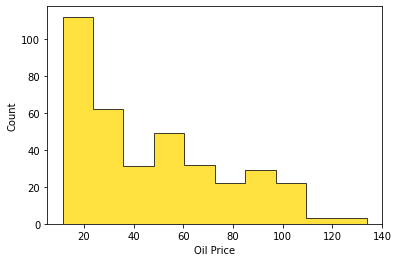

In [11]:
# Histogram of Oil Price
a = data['Oil_Price']
plt.hist(a, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='gold', edgecolor='black')
plt.xlabel('Oil Price')
plt.ylabel('Count');

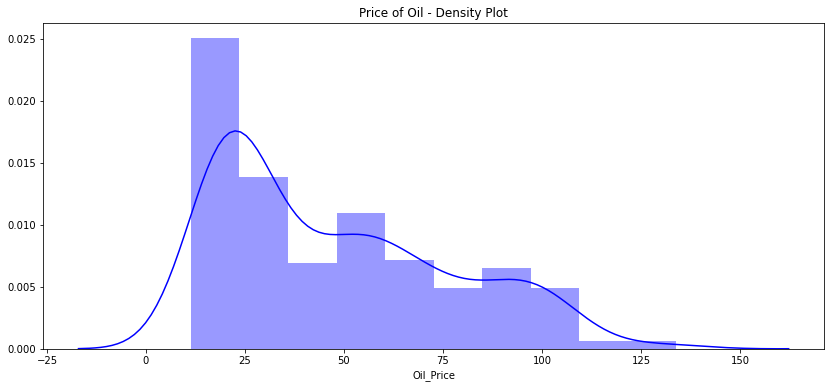

In [12]:
# Density Plot of Oil Price
plt.figure(figsize = (14,6))
plt.title('Price of Oil - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['Oil_Price'], kde=True, bins=10, color="blue")
plt.show()

In [13]:
data['Oil_Price'].value_counts().head(5)

19.95    2
19.66    2
19.09    2
45.18    2
19.90    2
Name: Oil_Price, dtype: int64

Oil Price of around $20.00 Per Barrel has the highest count of instances in the dataset.

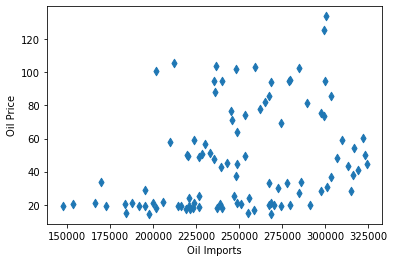

In [14]:
# Scatter Plot of Oil Price vs Oil Imports
data_sample = data.sample(100)

x = data_sample['Oil_Imports']
y = data_sample['Oil_Price']

plt.scatter(x, y, marker='d')
plt.xlabel('Oil Imports')
plt.ylabel('Oil Price');

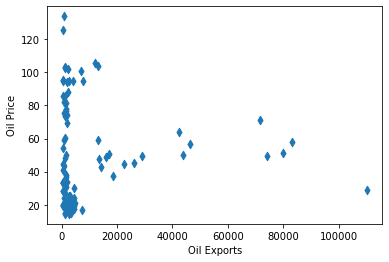

In [15]:
# Scatter Plot of Oil Price vs Oil Exports
x = data_sample['Oil_Exports']

plt.scatter(x, y, marker='d')
plt.xlabel('Oil Exports')
plt.ylabel('Oil Price');

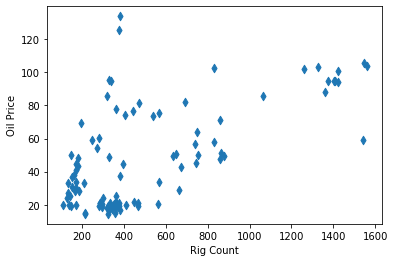

In [16]:
# Scatter Plot of Oil Price vs Rig Count
x = data_sample['Rig_Count']

plt.scatter(x, y, marker='d')
plt.xlabel('Rig Count')
plt.ylabel('Oil Price');

The Rig Count appears to have some linear relationship with Oil Price, as the number of Rigs in Operation increases the Oil Price increases.

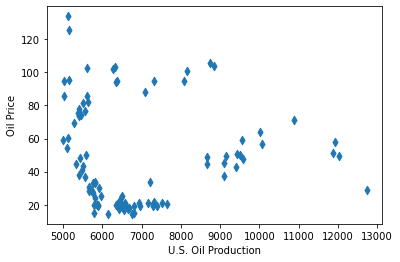

In [17]:
# Scatter Plot of Oil Price vs US Oil Production
x = data_sample['U.S._Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('U.S. Oil Production')
plt.ylabel('Oil Price');

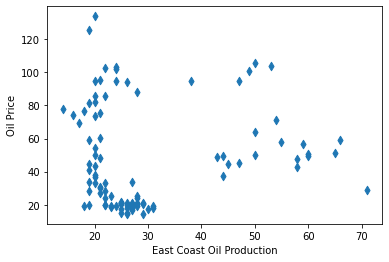

In [18]:
# Scatter Plot of Oil Price vs East Coast Oil Production
x = data_sample['EastCoast_Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('East Coast Oil Production')
plt.ylabel('Oil Price');

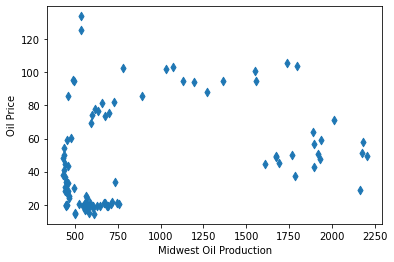

In [19]:
# Scatter Plot of Oil Price vs Midwest Oil Production
x = data_sample['Midwest_Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('Midwest Oil Production')
plt.ylabel('Oil Price');

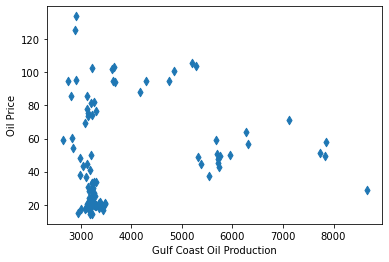

In [20]:
# Scatter Plot of Oil Price vs Gulf Coast Oil Production
x = data_sample['GulfCoast_Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('Gulf Coast Oil Production')
plt.ylabel('Oil Price');

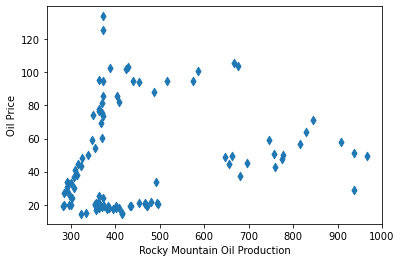

In [21]:
# Scatter Plot of Oil Price vs Rocky Mountain Oil Production
x = data_sample['RockyMountain_Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('Rocky Mountain Oil Production')
plt.ylabel('Oil Price');

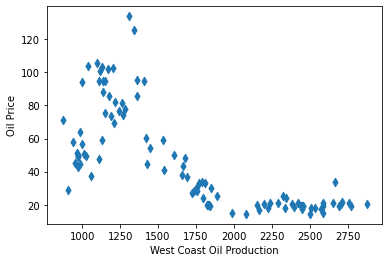

In [22]:
# Scatter Plot of Oil Price vs West Coast Oil Production
x = data_sample['WestCoast_Oil_Production']

plt.scatter(x, y, marker='d')
plt.xlabel('West Coast Oil Production')
plt.ylabel('Oil Price');

This is interesting. It appears that the West Coast Oil Production has a negative relationship with Oil Price, as West Coast Production increases the Oil Price decreases.

Let's check the attribute Rig Count with the other variables.

In [23]:
# Check number of distinct values for Rig Count
data['Rig_Count'].value_counts().shape

(282,)

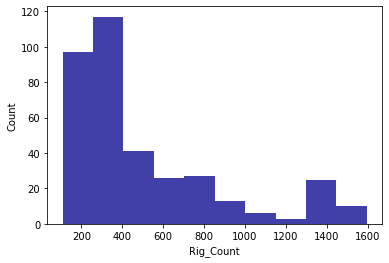

In [24]:
# Histogram of Rig Count
r = data['Rig_Count']
plt.hist(r, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='darkblue', edgecolor='none')
plt.xlabel('Rig_Count')
plt.ylabel('Count');

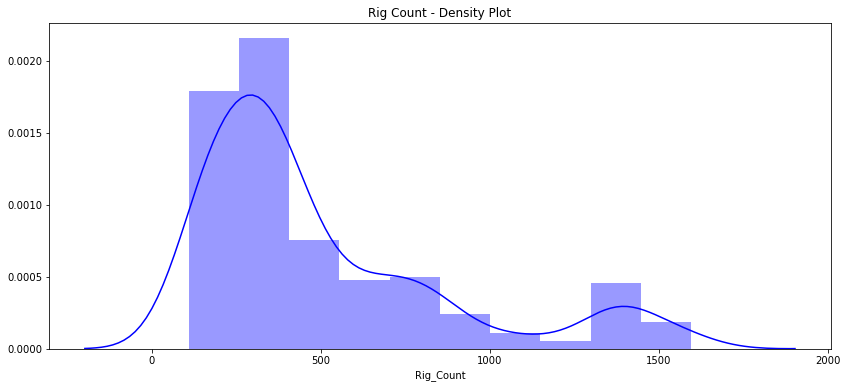

In [25]:
# Density Plot of Rig Count
plt.figure(figsize = (14,6))
plt.title('Rig Count - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['Rig_Count'], kde=True, bins=10, color="blue")
plt.show()

In [26]:
data['Rig_Count'].value_counts().head(5)

153    5
320    4
397    4
325    4
433    3
Name: Rig_Count, dtype: int64

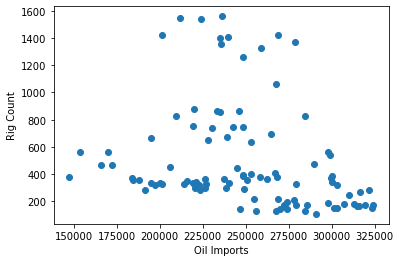

In [27]:
# Scatter Plot of Rig Count vs Oil Imports
x = data_sample['Oil_Imports']
y = data_sample['Rig_Count']

plt.scatter(x, y, marker='o')
plt.xlabel('Oil Imports')
plt.ylabel('Rig Count');

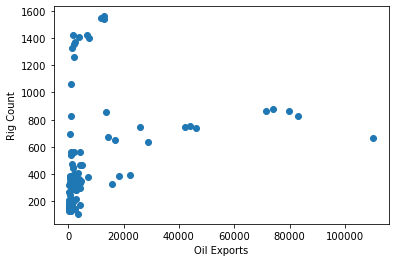

In [28]:
# Scatter Plot of Rig Count vs Oil Exports
x = data_sample['Oil_Exports']

plt.scatter(x, y, marker='o')
plt.xlabel('Oil Exports')
plt.ylabel('Rig Count');

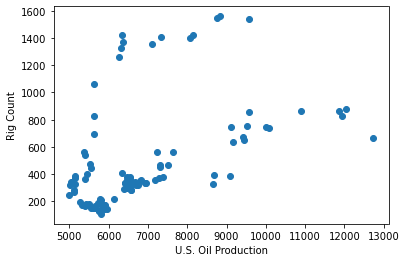

In [29]:
# Scatter Plot of Rig Count vs US Oil Production
x = data_sample['U.S._Oil_Production']

plt.scatter(x, y, marker='o')
plt.xlabel('U.S. Oil Production')
plt.ylabel('Rig Count');

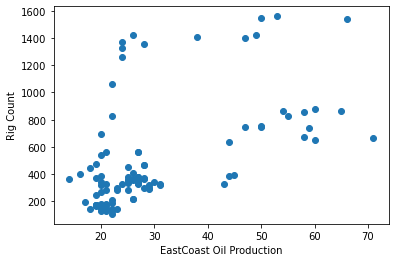

In [30]:
# Scatter Plot of Rig Count vs East Coast Oil Production
x = data_sample['EastCoast_Oil_Production']

plt.scatter(x, y, marker='o')
plt.xlabel('EastCoast Oil Production')
plt.ylabel('Rig Count');

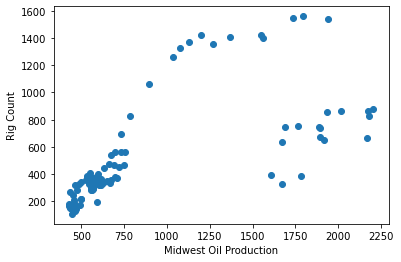

In [31]:
# Scatter Plot of Rig Count vs Midwest Oil Production
x = data_sample['Midwest_Oil_Production']

plt.scatter(x, y, marker='o')
plt.xlabel('Midwest Oil Production')
plt.ylabel('Rig Count');

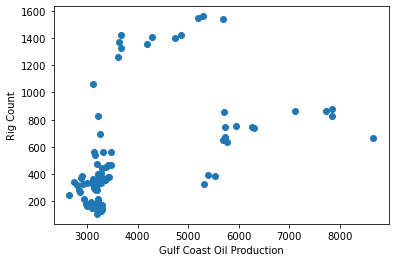

In [32]:
# Scatter Plot of Rig Count vs Gulf Coast Oil Production
x = data_sample['GulfCoast_Oil_Production']

plt.scatter(x, y, marker='o')
plt.xlabel('Gulf Coast Oil Production')
plt.ylabel('Rig Count');

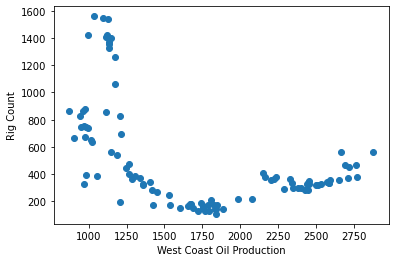

In [33]:
# Scatter Plot of Rig Count vs West Coast Oil Production
x = data_sample['WestCoast_Oil_Production']

plt.scatter(x, y, marker='o')
plt.xlabel('West Coast Oil Production')
plt.ylabel('Rig Count');

It seems as Production increases the Rig Count increases, which is what I would expect, for all but the West Coast Region which actually decreases in Rig Count as Production increases.

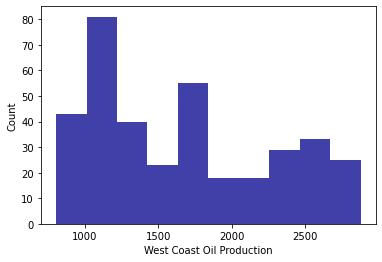

In [34]:
# Histogram of West Coast Oil Production
w = data['WestCoast_Oil_Production']
plt.hist(w, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='darkblue', edgecolor='none')
plt.xlabel('West Coast Oil Production')
plt.ylabel('Count');

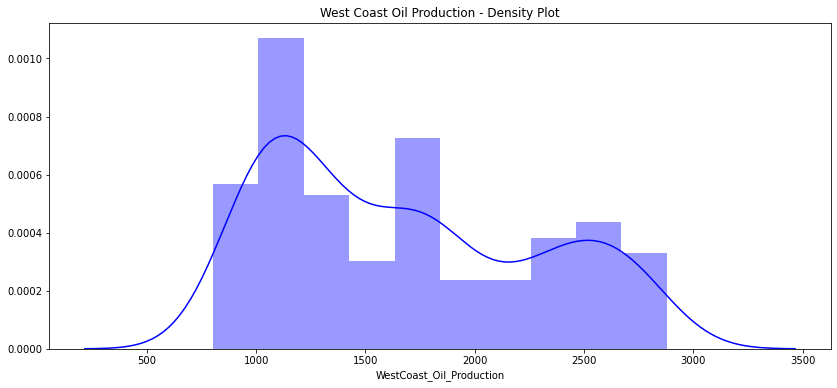

In [35]:
# Density Plot of West Coast Oil Production
plt.figure(figsize = (14,6))
plt.title('West Coast Oil Production - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data['WestCoast_Oil_Production'], kde=True, bins=10, color="blue")
plt.show()

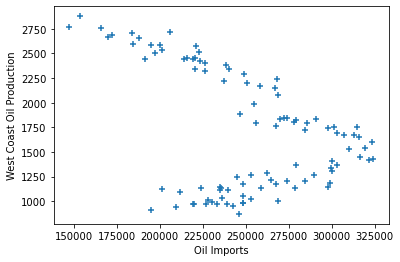

In [36]:
# Scatter Plot of West Coast Oil Production vs Oil Imports
x = data_sample['Oil_Imports']
y = data_sample['WestCoast_Oil_Production']

plt.scatter(x, y, marker='+')
plt.xlabel('Oil Imports')
plt.ylabel('West Coast Oil Production');

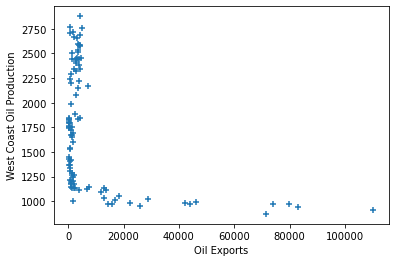

In [37]:
# Scatter Plot of West Coast Oil Production vs Oil Exports
x = data_sample['Oil_Exports']

plt.scatter(x, y, marker='+')
plt.xlabel('Oil Exports')
plt.ylabel('West Coast Oil Production');

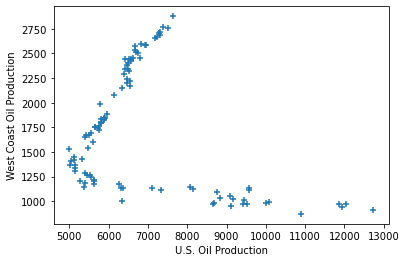

In [38]:
# Scatter Plot of West Coast Oil Production vs US Oil Production
x = data_sample['U.S._Oil_Production']

plt.scatter(x, y, marker='+')
plt.xlabel('U.S. Oil Production')
plt.ylabel('West Coast Oil Production');

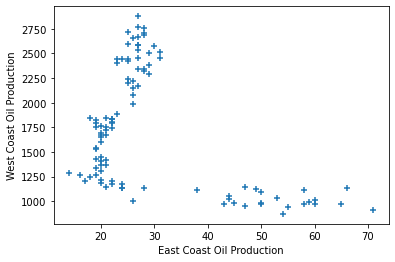

In [39]:
# Scatter Plot of West Coast Oil Production vs East Coast Oil Production
x = data_sample['EastCoast_Oil_Production']

plt.scatter(x, y, marker='+')
plt.xlabel('East Coast Oil Production')
plt.ylabel('West Coast Oil Production');

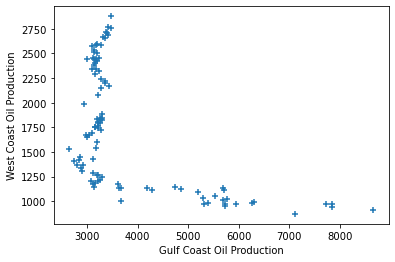

In [40]:
# Scatter Plot of West Coast Oil Production vs Gulf Coast Oil Production
x = data_sample['GulfCoast_Oil_Production']

plt.scatter(x, y, marker='+')
plt.xlabel('Gulf Coast Oil Production')
plt.ylabel('West Coast Oil Production');

It seems that West Coast Oil Production decreases when U.S. Oil Imports and Production increases.

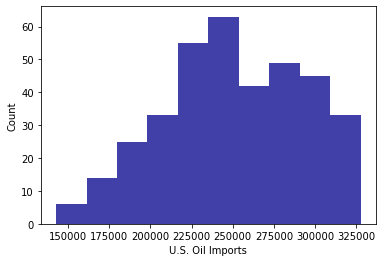

In [41]:
# Histogram of US Oil Imports
w = data['Oil_Imports']
plt.hist(w, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='darkblue', edgecolor='none')
plt.xlabel('U.S. Oil Imports')
plt.ylabel('Count');

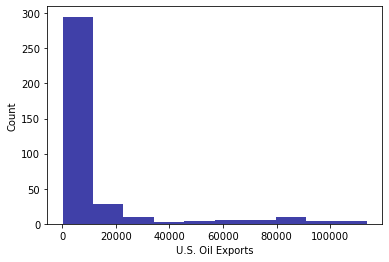

In [42]:
# Histogram of US Oil Exports
w = data['Oil_Exports']
plt.hist(w, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='darkblue', edgecolor='none')
plt.xlabel('U.S. Oil Exports')
plt.ylabel('Count');

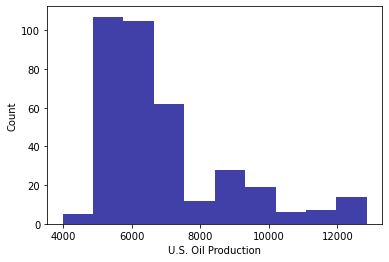

In [43]:
# Histogram of US Oil Production
w = data['U.S._Oil_Production']
plt.hist(w, bins=10, density=False, alpha=0.75, histtype='stepfilled', color='darkblue', edgecolor='none')
plt.xlabel('U.S. Oil Production')
plt.ylabel('Count');

I will have to scale the data for the SV and MLP Regression Models. I'm curious to see which regions account for the highest and lowest percentage of US Production. 

In [44]:
X = data['EastCoast_Oil_Production'].sum()
y = data['U.S._Oil_Production'].sum()
perc = X / y
print(perc)

0.004423569733511808


In [45]:
X = data['Midwest_Oil_Production'].sum()
y = data['U.S._Oil_Production'].sum()
perc = X / y
print(perc)

0.12805687503208205


In [46]:
X = data['GulfCoast_Oil_Production'].sum()
y = data['U.S._Oil_Production'].sum()
perc = X / y
print(perc)

0.5591529552983728


In [47]:
X = data['RockyMountain_Oil_Production'].sum()
y = data['U.S._Oil_Production'].sum()
perc = X / y
print(perc)

0.06679657423091959


In [48]:
X = data['WestCoast_Oil_Production'].sum()
y = data['U.S._Oil_Production'].sum()
perc = X / y
print(perc)

0.24157121027256898


The Gulf Coast Region by far has the highest percentage of U.S. Oil Production, accounting for 56% of the total production. The Gulf Coast and West Coast Regions account for 80% of the total U.S. Oil Production. The East Coast has the lowest percentage, accounting for less than 1% of the total production.

In [49]:
# Check the correlations of the variables
data.corr()

,Oil_Price,Oil_Imports,Oil_Exports,Rig_Count,U.S._Oil_Production,EastCoast_Oil_Production,Midwest_Oil_Production,GulfCoast_Oil_Production,RockyMountain_Oil_Production,WestCoast_Oil_Production
Oil_Price,1.000000,0.300876,0.081131,0.645806,0.019949,0.138084,0.337257,0.169090,0.223246,-0.726984
Oil_Imports,0.300876,1.000000,-0.325868,-0.290850,-0.590451,-0.494174,-0.408121,-0.390281,-0.498985,-0.379709
Oil_Exports,0.081131,-0.325868,1.000000,0.259742,0.867794,0.811246,0.770525,0.911947,0.849272,-0.438754
Rig_Count,0.645806,-0.290850,0.259742,1.000000,0.465431,0.533553,0.667703,0.474204,0.544584,-0.470431
U.S._Oil_Production,0.019949,-0.590451,0.867794,0.465431,1.000000,0.953711,0.920202,0.963175,0.960199,-0.324072
EastCoast_Oil_Production,0.138084,-0.494174,0.811246,0.533553,0.953711,1.000000,0.939823,0.939674,0.946852,-0.429356
Midwest_Oil_Production,0.337257,-0.408121,0.770525,0.667703,0.920202,0.939823,1.000000,0.944143,0.962669,-0.605206
GulfCoast_Oil_Production,0.169090,-0.390281,0.911947,0.474204,0.963175,0.939674,0.944143,1.000000,0.951945,-0.546096
RockyMountain_Oil_Production,0.223246,-0.498985,0.849272,0.544584,0.960199,0.946852,0.962669,0.951945,1.000000,-0.474619
WestCoast_Oil_Production,-0.726984,-0.379709,-0.438754,-0.470431,-0.324072,-0.429356,-0.605206,-0.546096,-0.474619,1.000000


The variables West Coast Oil Production and Rig Count have the highest correlation with Oil Price in the dataset. U.S. Oil Production and Oil Exports have the lowest correlation with Oil Price in the dataset.

In [50]:
# Check the covariance of the variables
data.cov()

,Oil_Price,Oil_Imports,Oil_Exports,Rig_Count,U.S._Oil_Production,EastCoast_Oil_Production,Midwest_Oil_Production,GulfCoast_Oil_Production,RockyMountain_Oil_Production,WestCoast_Oil_Production
Oil_Price,847.283060,3.712482e+05,5.291918e+04,7.121745e+03,1.094595e+03,59.328547,5.571382e+03,6.976734e+03,1.205338e+03,-1.271846e+04
Oil_Imports,371248.205610,1.796899e+09,-3.095388e+08,-4.670901e+06,-4.718004e+07,-309206.537716,-9.818344e+06,-2.345086e+07,-3.923388e+06,-9.674046e+06
Oil_Exports,52919.180361,-3.095388e+08,5.021382e+08,2.205080e+06,3.665565e+07,268331.021444,9.799095e+06,2.896684e+07,3.529960e+06,-5.909199e+06
Rig_Count,7121.744619,-4.670901e+06,2.205080e+06,1.435292e+05,3.323824e+05,2983.695657,1.435625e+05,2.546572e+05,3.826897e+04,-1.071178e+05
U.S._Oil_Production,1094.595422,-4.718004e+07,3.665565e+07,3.323824e+05,3.553245e+06,26536.031236,9.844270e+05,2.573582e+06,3.357263e+05,-3.671552e+05
EastCoast_Oil_Production,59.328547,-3.092065e+05,2.683310e+05,2.983696e+03,2.653603e+04,217.878112,7.873003e+03,1.966094e+04,2.592390e+03,-3.809074e+03
Midwest_Oil_Production,5571.381583,-9.818344e+06,9.799095e+06,1.435625e+05,9.844270e+05,7873.003357,3.220884e+05,7.595306e+05,1.013388e+05,-2.064365e+05
GulfCoast_Oil_Production,6976.733612,-2.345086e+07,2.896684e+07,2.546572e+05,2.573582e+06,19660.940863,7.595306e+05,2.009279e+06,2.502900e+05,-4.652477e+05
RockyMountain_Oil_Production,1205.337566,-3.923388e+06,3.529960e+06,3.826897e+04,3.357263e+05,2592.389500,1.013388e+05,2.502900e+05,3.440512e+04,-5.291176e+04
WestCoast_Oil_Production,-12718.459150,-9.674046e+06,-5.909199e+06,-1.071178e+05,-3.671552e+05,-3809.073672,-2.064365e+05,-4.652477e+05,-5.291176e+04,3.612360e+05


West Coast Production has the only negative covariance with Oil Price in the dataset, as Oil Price increases West Coast Production decreases and vice versa. Interesting Note, West Coast Production has a negative covariance with every other variable in the dataset.

In [51]:
# Check the variance of the variables
data.var()

Oil_Price                       8.472831e+02
Oil_Imports                     1.796899e+09
Oil_Exports                     5.021382e+08
Rig_Count                       1.435292e+05
U.S._Oil_Production             3.553245e+06
EastCoast_Oil_Production        2.178781e+02
Midwest_Oil_Production          3.220884e+05
GulfCoast_Oil_Production        2.009279e+06
RockyMountain_Oil_Production    3.440512e+04
WestCoast_Oil_Production        3.612360e+05
dtype: float64

As expected, the variance for these continuous variables is large. Scaling the data will help.

In [52]:
# Discretize Oil Price using 4 bins (Low, Medium, High, Very High)
data['Oil_Price_Disc'] = pd.cut(data['Oil_Price'], bins=[10,35,60,85,133.88], labels=['Low','Medium','High','Very High'])
data.head()

,Oil_Price,Oil_Imports,Oil_Exports,Rig_Count,U.S._Oil_Production,EastCoast_Oil_Production,Midwest_Oil_Production,GulfCoast_Oil_Production,RockyMountain_Oil_Production,WestCoast_Oil_Production,Oil_Price_Disc
0,22.86,192572,4084,514,7546,35,785,3374,505,2847,Low
1,22.11,165046,2843,492,7497,35,744,3401,508,2809,Low
2,20.39,189625,4104,478,7433,31,745,3348,508,2801,Low
3,18.43,174393,3338,484,7407,32,736,3354,502,2783,Low
4,18.20,200067,3474,493,7328,31,737,3310,506,2744,Low


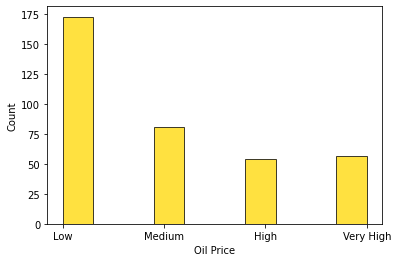

In [53]:
# Histogram of Oil Price Discretized
a = data['Oil_Price_Disc']
plt.hist(a, density=False, alpha=0.75, histtype='stepfilled', color='gold', edgecolor='black')
plt.xlabel('Oil Price')
plt.ylabel('Count');

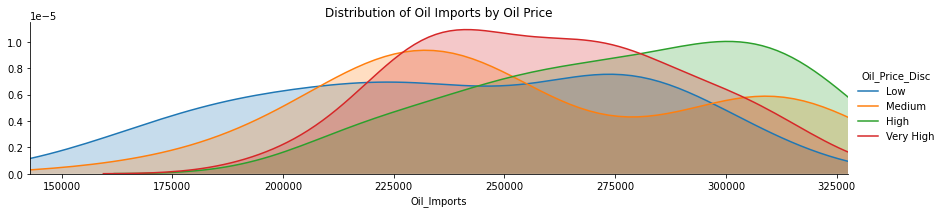

In [55]:
# Kde Distribution Plot of Oil Imports by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'Oil_Imports', shade=True)
amax = data['Oil_Imports'].max()
fig.set(xlim=(142930,amax))
fig.set(title='Distribution of Oil Imports by Oil Price')
fig.add_legend();

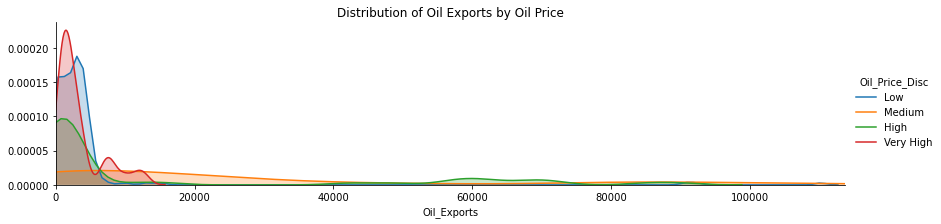

In [57]:
# Kde Distribution Plot of Oil Exports by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'Oil_Exports', shade=True)
amax = data['Oil_Exports'].max()
fig.set(xlim=(0,amax))
fig.set(title='Distribution of Oil Exports by Oil Price')
fig.add_legend();

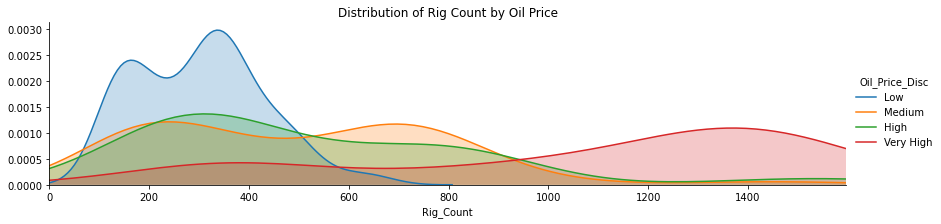

In [58]:
# Kde Distribution Plot of Rig Count by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'Rig_Count', shade=True)
amax = data['Rig_Count'].max()
fig.set(xlim=(0,amax))
fig.set(title='Distribution of Rig Count by Oil Price')
fig.add_legend();

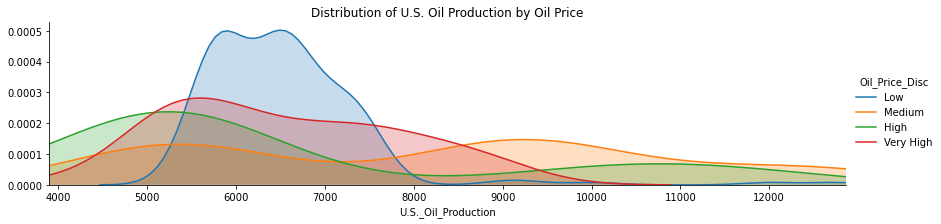

In [59]:
# Kde Distribution Plot of U.S. Production by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'U.S._Oil_Production', shade=True)
amax = data['U.S._Oil_Production'].max()
fig.set(xlim=(3900,amax))
fig.set(title='Distribution of U.S. Oil Production by Oil Price')
fig.add_legend();

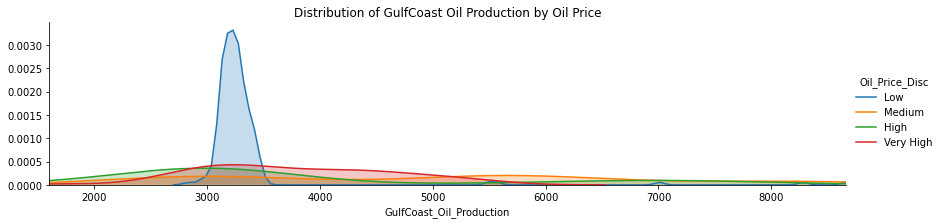

In [60]:
# Kde Distribution Plot of U.S. Production by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'GulfCoast_Oil_Production', shade=True)
amax = data['GulfCoast_Oil_Production'].max()
fig.set(xlim=(1600,amax))
fig.set(title='Distribution of GulfCoast Oil Production by Oil Price')
fig.add_legend();

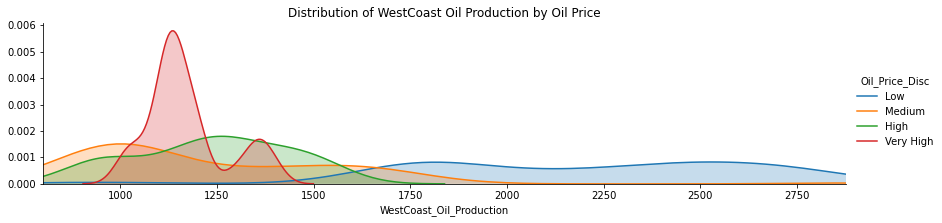

In [62]:
# Kde Distribution Plot of U.S. Production by Oil Price Discretized
fig = sns.FacetGrid(data, hue='Oil_Price_Disc', aspect=4)
fig.map(sns.kdeplot, 'WestCoast_Oil_Production', shade=True)
amax = data['WestCoast_Oil_Production'].max()
fig.set(xlim=(800,amax))
fig.set(title='Distribution of WestCoast Oil Production by Oil Price')
fig.add_legend();

All of these graphs make sense to me with the one exception of West Coast Production. When the Price of Oil is Very High the Production is Low and when the Price is Low the Production is Very High. Obviously there are other factors influencing this variable, might cause problems for my model. I will keep this in mind.

In [63]:
# Average Rig Count by Oil Price Discretized (pivot table)
data.pivot_table('Rig_Count', 'Oil_Price_Disc', aggfunc=np.mean, margins=True)

,Rig_Count
Oil_Price_Disc,
Low,302.289017
Medium,505.530864
High,531.037037
Very High,1083.859649
All,503.287671


In [64]:
# Average West Coast Production by Oil Price Discretized (pivot table)
data.pivot_table('WestCoast_Oil_Production', 'Oil_Price_Disc', aggfunc=np.mean, margins=True)

,WestCoast_Oil_Production
Oil_Price_Disc,
Low,2193.075145
Medium,1221.135802
High,1236.444444
Very High,1170.421053
All,1676.153425


In [65]:
# Average Oil Imports by Oil Price Discretized (pivot table)
data.pivot_table('Oil_Imports', 'Oil_Price_Disc', aggfunc=np.mean, margins=True)

,Oil_Imports
Oil_Price_Disc,
Low,237363.855491
Medium,254500.765432
High,277580.537037
Very High,259642.701754
All,250595.868493


In [66]:
# Average Oil Exports by Oil Price Discretized (pivot table)
data.pivot_table('Oil_Exports', 'Oil_Price_Disc', aggfunc=np.mean, margins=True)

,Oil_Exports
Oil_Price_Disc,
Low,4253.404624
Medium,25832.061728
High,15695.259259
Very High,3280.210526
All,10582.882192


In [67]:
# Average US Production by Oil Price Discretized (pivot table)
data.pivot_table('U.S._Oil_Production', 'Oil_Price_Disc', aggfunc=np.mean, margins=True)

,U.S._Oil_Production
Oil_Price_Disc,
Low,6542.439306
Medium,8241.814815
High,6670.740741
Very High,6542.473684
All,6938.547945


MODELING & EVALUATION

In [2]:
# Import the cleaned Dataset
data = pd.read_csv('Capstone_Cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Oil_Price                     365 non-null    float64
 1   Oil_Imports                   365 non-null    int64  
 2   Oil_Exports                   365 non-null    int64  
 3   Rig_Count                     365 non-null    int64  
 4   U.S._Oil_Production           365 non-null    int64  
 5   EastCoast_Oil_Production      365 non-null    int64  
 6   Midwest_Oil_Production        365 non-null    int64  
 7   GulfCoast_Oil_Production      365 non-null    int64  
 8   RockyMountain_Oil_Production  365 non-null    int64  
 9   WestCoast_Oil_Production      365 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 28.6 KB


In [3]:
# Set features and target variable
X = data.drop(['Oil_Price'], axis=1)
y = data['Oil_Price']
print(X.shape)
print(y.shape)

(365, 9)
(365,)


I will start with just the models and raw data to see the progression as I move forward.

In [4]:
# Prepare the Models
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
algosClass.append(('SVR', SVR()))
algosClass.append(('MLP Regressor', MLPRegressor()))

In [5]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -48.69051481232898
Gradient Boosting Regressor -33.606286653419026
SVR -33.42852539262247
MLP Regressor -731.7638215281191


The results are not good. Let's scale the data and see if these scores improve.

In [7]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.shape)

(365, 9)


In [8]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -46.93140886753403
Gradient Boosting Regressor -32.88028032177679
SVR -24.72054295355821
MLP Regressor -7.127750645374614


Scaling the data greatly improved the MLP Regressor. Let's try the same scaler with mean=False.

In [10]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.StandardScaler(with_mean=False).fit(X)
X_scaled_2 = scaler.transform(X)
print(X_scaled_2.shape)

(365, 9)


In [11]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled_2, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -45.80296692605912
Gradient Boosting Regressor -33.99044331743731
SVR -28.429131796995588
MLP Regressor -27.214449169284126


Let's try some different scalers to see if we can improve those scores.

In [13]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled_3 = scaler.transform(X)
print(X_scaled_3.shape)

(365, 9)


In [14]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled_3, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -47.845418893235426
Gradient Boosting Regressor -32.874895324407966
SVR -22.82371183815904
MLP Regressor -10.365738572408718


In [16]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.RobustScaler().fit(X)
X_scaled_4 = scaler.transform(X)
print(X_scaled_4.shape)

(365, 9)


In [17]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled_4, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -49.929159868954336
Gradient Boosting Regressor -33.343891359538596
SVR -33.90392771260985
MLP Regressor -7.776633068816295


In [19]:
# Create the scaler, fit it to X, and then transform X to scaled data
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled_5 = scaler.transform(X)
print(X_scaled_5.shape)

(365, 9)


In [20]:
# Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X_scaled_5, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Output
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -48.33546462981986
Gradient Boosting Regressor -31.971151783950287
SVR -24.829972700642703
MLP Regressor -17.157836521027185


Best Scaler Results Per Model:

Random Forest - Standard Scaler (with_mean=False) = -45.80

Gradient Boosting - MaxAbs Scaler = -31.97

SVR - MinMax Scaler = -22.82

MLP - Standard Scaler (with_mean=True) = -7.12

Now I want to try to set the parameters of my models. I will try with Grid Search CV.

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [23]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'max_leaf_nodes': [5, 10, 20, 50],
             'min_samples_split': [2, 5, 10, 20],
             'n_estimators': [100, 300, 600, 1000]}

# create the grid
grid_tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3, scoring= 'r2')

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

RandomForestRegressor(max_depth=9, max_leaf_nodes=50)
0.9145012206399907


In [24]:
algo = RandomForestRegressor(max_depth=9, max_leaf_nodes=50)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [25]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.898
MSE is: 76.594
RMSE is: 8.752


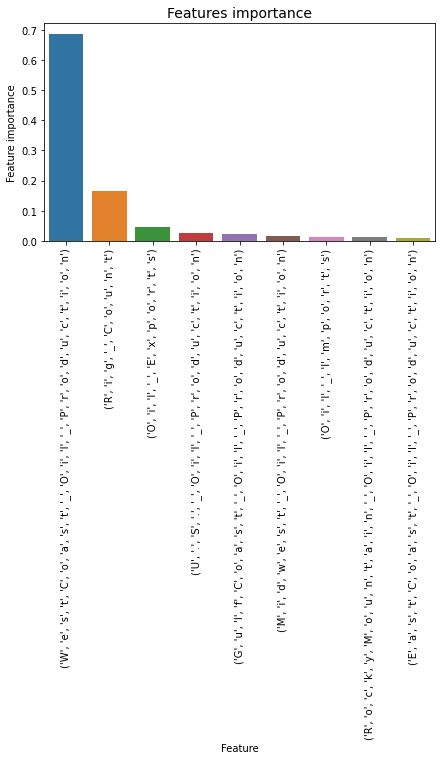

In [26]:
# Check the features importance
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

To my surprise, the most important feature by far is the one I couldn't make sense of, West Coast Oil Production. That's why you never make assumptions in predictive modeling and just let the algorithm do its work.

Now I want to see which features are most important using Principal Component Analysis (PCA). This will show me the explained variance.

In [27]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(365, 9)


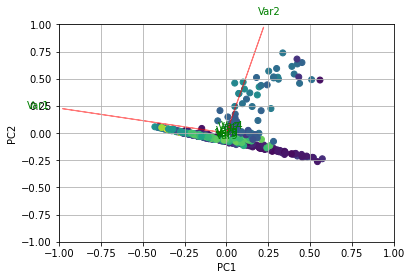

In [28]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

The graph shows Variables 1 and 2 being the most important features, which is Oil Imports and Exports.

In [29]:
pca.explained_variance_ratio_

array([8.10797250e-01, 1.88660412e-01, 4.42292510e-04, 7.41620779e-05,
       2.11380925e-05, 4.44417074e-06, 2.94490981e-07, 7.14054351e-09,
       3.20506069e-11])

I see that PC1 explains over 80% of the variance, lets make a data frame to show the top 5 most important features in PC1 and PC2.

In [30]:
# X is the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, X):

    # Change pcs components ndarray to a dataframe
    importance_df = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns = X.columns

    # Change to absolute values
    importance_df = importance_df.apply(np.abs)

    # Transpose
    importance_df = importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df = create_importance_dataframe(pca, X)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 5 important features
pc1_top_5_features = importance_df['PC1'].sort_values(ascending = False)[:5]
print(), print(f'PC1 top 5 feautres are \n')
display(pc1_top_5_features )

## PC2 top 5 important features
pc2_top_5_features = importance_df['PC2'].sort_values(ascending = False)[:5]
print(), print(f'PC2 top 5 feautres are \n')
display(pc2_top_5_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Oil_Imports,0.974498,0.223670,0.010824,0.012415,0.007193,0.001136,0.000006,0.000033,5.894079e-07
Oil_Exports,0.221791,0.971108,0.084699,0.019798,0.011231,0.007316,0.003415,0.000016,3.744351e-06
Rig_Count,0.002705,0.002609,0.232344,0.481220,0.805512,0.248743,0.060885,0.000932,1.257657e-04
U.S._Oil_Production,0.029026,0.058432,0.659602,0.528288,0.179691,0.202852,0.104127,0.175842,4.078971e-01
EastCoast_Oil_Production,0.000194,0.000447,0.006674,0.001648,0.002040,0.010678,0.010641,0.912074,4.096865e-01



PC1 top 5 feautres are 



Oil_Imports                 0.974498
Oil_Exports                 0.221791
U.S._Oil_Production         0.029026
GulfCoast_Oil_Production    0.015722
Midwest_Oil_Production      0.006304
Name: PC1, dtype: float64


PC2 top 5 feautres are 



Oil_Exports                 0.971108
Oil_Imports                 0.223670
U.S._Oil_Production         0.058432
GulfCoast_Oil_Production    0.053261
WestCoast_Oil_Production    0.018299
Name: PC2, dtype: float64

The features Oil Imports and Oil Exports are by far the most important features in the Principal Component Analysis. West Coast Oil Production is the most important feature for my model when predicting the Price of Oil.

Now run the model with the parameters found by Grid Search CV and scale the data with the Standard Scaler (with_mean=False).

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [32]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
algo = RandomForestRegressor(max_depth=9, max_leaf_nodes=50)
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [34]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.898
MSE is: 76.144
RMSE is: 8.726


It's a good score but now I want to try the Grid Search on the other models to see if we can beat this score.

In [35]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'max_leaf_nodes': [5, 10, 20, 50],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 300, 600]}

# create the grid
grid_tree = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 3, scoring= 'r2')

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

GradientBoostingRegressor(max_depth=6, max_leaf_nodes=10, n_estimators=300)
0.9222776034416443


In [36]:
scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
algo = GradientBoostingRegressor(max_depth=6, max_leaf_nodes=10, n_estimators=300)
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [38]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.889
MSE is: 82.854
RMSE is: 9.102


In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [40]:
algo = GradientBoostingRegressor(max_depth=6, max_leaf_nodes=10, n_estimators=300)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [41]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.887
MSE is: 84.669
RMSE is: 9.202


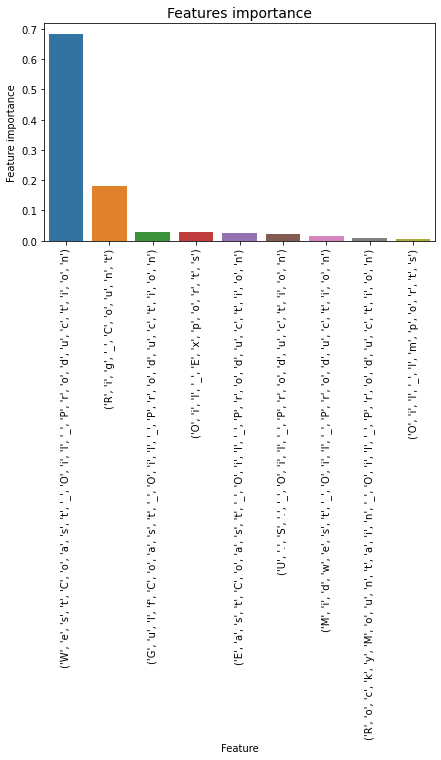

In [42]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

West Coast Production is again by far the most important feature for predicting the Price of Oil.

In [45]:
# define the parameters grid
param_grid = {'alpha': np.arange(0.001, 0.1),
             'hidden_layer_sizes': [(100,), (200,), (300,)],
             'max_iter': [300, 500, 700]}

# create the grid
grid_tree = GridSearchCV(MLPRegressor(), param_grid, cv = 3, scoring= 'r2')

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(300,), max_iter=300)
15.880223546571436


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [47]:
algo = MLPRegressor(alpha=0.001, hidden_layer_sizes=(300,), max_iter=300)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [48]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: -0.449
MSE is: 1086.558
RMSE is: 32.963


In [49]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
algo = MLPRegressor(alpha=0.001, hidden_layer_sizes=(300,), max_iter=300)
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

C:\Users\Owner\New folder\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.852
MSE is: 111.294
RMSE is: 10.550


In [56]:
# define the parameters grid
param_grid = {'C': np.arange(0.01, 0.1),
              'epsilon': [0.2, 0.3, 0.4],
              'cache_size': [100, 300, 500],
              'max_iter': [300, 500, 700]}

# create the grid
grid_tree = GridSearchCV(SVR(), param_grid, cv = 3, scoring= 'r2')

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

SVR(C=0.01, cache_size=100, epsilon=0.2, max_iter=300)
0.12565267094662583


In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [58]:
algo = SVR(C=0.01, cache_size=100, epsilon=0.2, max_iter=300)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [59]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: -0.064
MSE is: 797.689
RMSE is: 28.243


In [60]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
algo = SVR(C=0.01, cache_size=100, epsilon=0.2, max_iter=300)
model = algo.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)

In [62]:
# Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: -0.045
MSE is: 783.595
RMSE is: 27.993


Best Results Per Model:

Random Forest Regressor - r2 Score = 0.898, RMSE = 8.726

Gradient Boosting Regressor - r2 Score = 0.889, RMSE = 9.102

MLP Regressor - r2 Score = 0.852, RMSE = 10.55

Support Vector Regressor - r2 Score = -0.045, RMSE = 27.993

The results of the analysis show I was able to build a model that can accurately predict the Price of Oil using the predictor variables in the dataset. The Random Forest Regressor model obtained the highest r2 score at 0.898 and the lowest RMSE at 8.726. Considering there are 348 distinct values for Oil Price ranging from 11.00 to 133.00 dollars, an average error of only 8.726 is exceptable for me. Using Grid Search CV to set the model parameters was the biggest factor in improving the model's performance. The variables West Coast Oil Production, Oil Imports, and Oil Exports were the most important features in the dataset for predicting the Price of Oil. The Gulf Coast Region by far produces the most oil in the U.S., with the East Coast Region producing the least.